# Ordered, 5-opt

In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [2]:
file_path = "City_Dataset/city_name.txt"

with open(file_path, "r") as file:
    lines = file.readlines()

nameList = [line.strip() for line in lines]
nameList

['Augsburg',
 'Bielefeld',
 'Bochum',
 'Bremen1',
 'Darmstadt',
 'Essen',
 'Freiburg',
 'Giessen',
 'Hamburg',
 'Hannover',
 'Heilbronn',
 'Kaiserslautern',
 'Karlsruhe',
 'Kassel',
 'Kempten',
 'Koblenz',
 'Koeln',
 'Landshut',
 'Lichtenfels',
 'Mainz',
 'Muenchen',
 'Muenster',
 'Neuss',
 'Nuernburg',
 'Oldenburg',
 'Regensburg',
 'Rendsburg',
 'Stuttgart',
 'Ulm',
 'Wuerzburg',
 'Aachen',
 'Ansbach',
 'Aschaffenburg',
 'Bamberg',
 'Bayreuth',
 'Bonn',
 'Braunschweig',
 'Bremen2',
 'Coburg',
 'Dortmund',
 'Duesseldorf',
 'Duisburg',
 'Erlangen',
 'Frankfurt',
 'Fulda',
 'Fuerth',
 'Gelsen-Kirchen',
 'Gummersburg',
 'Hagen',
 'Hersbruck',
 'Ingolstadt',
 'Kiel',
 'Mannheim',
 'Marburg',
 'Offenburg',
 'Osnabrueck',
 'Reutlingen',
 'Saarbruecken',
 'Siegen']

In [3]:
df_data = pd.read_csv("City_Dataset/att48_coordinates.csv", header=None, names=['X', 'Y'])
df_data.shape

(48, 2)

In [4]:
df_data

,X,Y
0,6734,1453
1,2233,10
2,5530,1424
3,401,841
4,3082,1644
5,7608,4458
6,7573,3716
7,7265,1268
8,6898,1885
9,1112,2049


In [5]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [6]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [7]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [8]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [9]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [10]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [11]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

### Ordered

In [12]:
def breed(parent1, parent2):
    child = [None] * len(parent1)
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        child[i] = parent1[i]

    not_added = [item for item in parent2 if item not in child]
    idx = 0
    for i in range(len(child)):
        if child[i] is None:
            child[i] = not_added[idx]
            idx += 1

    return child


In [13]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

### 5-opt

In [14]:
def five_Opt(route, i, j, k, l, m):
    # 5개의 하위 경로
    part1 = route[:i]
    part2 = route[i:j]
    part3 = route[j:k]
    part4 = route[k:l]
    part5 = route[l:m]
    part6 = route[m:]

    # 5개의 하위 경로를 합치는 조합
    option1 = part1 + part5 + part4 + part3 + part2 + part6
    option2 = part1 + part2 + part6 + part5 + part4 + part3
    option3 = part1 + part2 + part3 + part6 + part5 + part4
    option4 = part1 + part2 + part4 + part5 + part3 + part6
    option5 = part1 + part6 + part3 + part2 + part5 + part4

    # 각 옵션의 거리 계산
    dist_option1 = sum(city.distance(option1[idx + 1]) for idx, city in enumerate(option1[:-1]))
    dist_option2 = sum(city.distance(option2[idx + 1]) for idx, city in enumerate(option2[:-1]))
    dist_option3 = sum(city.distance(option3[idx + 1]) for idx, city in enumerate(option3[:-1]))
    dist_option4 = sum(city.distance(option4[idx + 1]) for idx, city in enumerate(option4[:-1]))
    dist_option5 = sum(city.distance(option5[idx + 1]) for idx, city in enumerate(option5[:-1]))

    # 최소 거리인 옵션 선택
    min_dist = min(dist_option1, dist_option2, dist_option3, dist_option4, dist_option5)
    if min_dist == dist_option1:
        new_route = option1
    elif min_dist == dist_option2:
        new_route = option2
    elif min_dist == dist_option3:
        new_route = option3
    elif min_dist == dist_option4:
        new_route = option4
    else:
        new_route = option5

    return new_route


In [15]:
def mutate(individual, mutationRate):
    if random.random() < mutationRate:
        i, j, k, l, m = sorted(random.sample(range(len(individual)), 5))
        individual = five_Opt(individual, i, j, k, l, m)
    return individual

In [16]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop


In [17]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [18]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

## Running the genetic algorithm

In [19]:
cityList = []

for i in range(len(df_data)):
    X, Y = df_data.values[i]
    cityList.append(City(x=int(X), y=int(Y)))

print(len(cityList))

48


## Plot the improvement

In [20]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
        
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    return bestRoute

Initial distance: 134393.40857686315
Final distance: 46058.15967354742


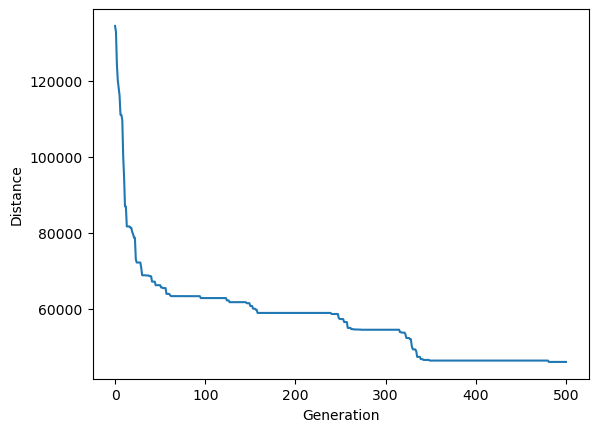

[(3245,3305),
 (5199,2182),
 (5468,2606),
 (6271,2135),
 (5989,2873),
 (6426,3173),
 (7545,2801),
 (7392,2244),
 (6898,1885),
 (6101,1110),
 (6107,669),
 (4985,140),
 (7265,1268),
 (6734,1453),
 (5530,1424),
 (4608,1198),
 (4612,2035),
 (5185,3258),
 (5900,3561),
 (6347,2683),
 (6807,2993),
 (7509,3239),
 (7462,3590),
 (7573,3716),
 (7248,3779),
 (7352,4506),
 (7541,3981),
 (7608,4458),
 (7762,4595),
 (7732,4723),
 (7611,5184),
 (7280,4899),
 (7555,4819),
 (4483,3369),
 (4706,2674),
 (4307,2322),
 (3484,2829),
 (1916,1569),
 (3082,1644),
 (3023,1942),
 (3177,756),
 (2233,10),
 (23,2216),
 (10,2676),
 (675,1006),
 (401,841),
 (1112,2049),
 (1633,2809)]

In [21]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

In [22]:
#Using For optimal 
file_path = "City_Dataset/att48_opttour.txt"
with open(file_path, "r") as file:
    lines = file.readlines()

opt = [int(line.strip()) - 1 for line in lines]
optList = []

for i in range(len(opt)):
            optList.append([df_data.loc[opt[i], "X"], df_data.loc[opt[i], "Y"]])

result = pd.read_csv("City_Dataset/result_12.csv", header=None, names=['X', 'Y'])
same = 0

for i in range(len(optList)):
    if(optList[i][0] == result.loc[i, 'X'] and optList[i][1] == result.loc[i, 'Y']):
        same += 1
        print(f"{i} index same {optList[i], result.loc[i]}")
print('----------------------------------------------------------------------------')
print(f"{same} count")
print(same/(len(optList) + len(result) - same))

18 index same ([5900, 3561], X    5900
Y    3561
Name: 18, dtype: int64)
----------------------------------------------------------------------------
1 count
0.010526315789473684
